# Titanic Analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

cur_dir = os.path.dirname('__file__')

train = pd.read_csv(os.path.join(cur_dir, "train.csv"))
test = pd.read_csv(os.path.join(cur_dir, "test.csv"))

## Class vs Number Survivors

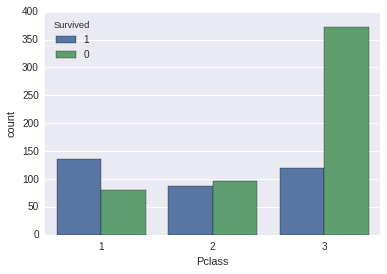

In [2]:
ax = sns.countplot(x="Pclass", hue="Survived", data=train.sort_values("Pclass"))

The 1st class had the best proportion. Third class was the most common.

## Sex vs. Survival

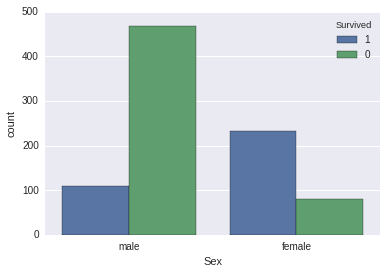

In [3]:
ax = sns.countplot(x="Sex", hue="Survived", data=train.sort_values("Pclass"))

Nearly all men died, and most women survived.

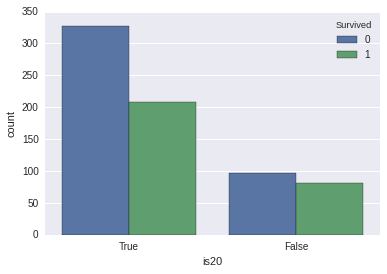

In [4]:
def is20(n):
    if pd.isnull(n):
        return n
    return n > 20

is20 = train.Age.apply(is20)
is20.name='is20'
train['is20'] = is20

ax = sns.countplot(x=is20, hue="Survived", data=train)

Children below 20 years old had an even chance at survival, most adults died.

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


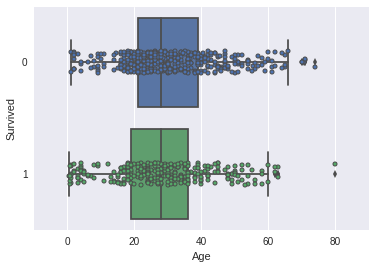

In [5]:
ax = sns.boxplot(data=train, x="Age", y="Survived", orient="h")
ax = sns.stripplot(x="Age", y="Survived", data=train, size=4, jitter=True, edgecolor="gray", orient="h")

The age distribution for survivors was slightly lower than those who died.

## By Age and Gender

Sex     is20 
female  False    0.688312
        True     0.782609
male    False    0.284314
        True     0.182336
Name: Survived, dtype: float64


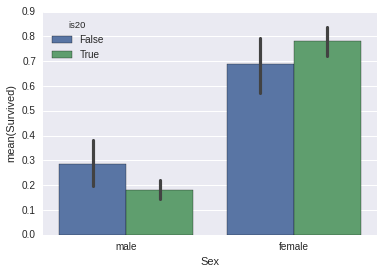

In [6]:
print train.groupby(['Sex', 'is20'])['Survived'].mean()
ax = sns.barplot(x="Sex", y="Survived", hue="is20", data=train.sort_values('is20'))

Interesting. Females survived regardless of their age (in fact, it seems older women faired better.) For males, much more under 20 boys survived.

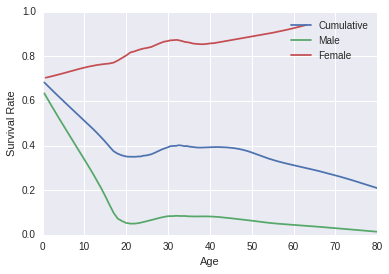

In [7]:
from statsmodels.nonparametric.smoothers_lowess import lowess

male = train[train.Sex == 'male']
female = train[train.Sex == 'female']

# sns.regplot(data=train, x='Age', y='Survived', lowess=True) # this makes a pretty line
# sns.regplot(data=male, x='Age', y='Survived', lowess=True) # this makes a flat line at 0.

# I also tried manually doing the regression, which is what seaborn does anyway.

l1 = lowess(train.Survived, train.Age, it=1)
plt.plot(l1[:, 0], l1[:, 1]) # pretty line!
plt.xlabel('Age')
plt.ylabel('Survival Rate')

l2 = lowess(male.Survived, male.Age, it=1)
plt.plot(l2[:, 0], l2[:, 1]) # flat line. :(

l3 = lowess(female.Survived, female.Age, it=1)
plt.plot(l3[:, 0], l3[:, 1]) # flat line. :(

plt.legend(['Cumulative', 'Male', 'Female'])

Here's a graph of survival rate vs age, smoothed out using LOWESS. We can see survival rate drops rapily from ages 0-20, with infants being very likely to survive and 20-year-olds have a 35% chance. From age 20-50 it is realtively even, and after age 50 it continues dropping off.

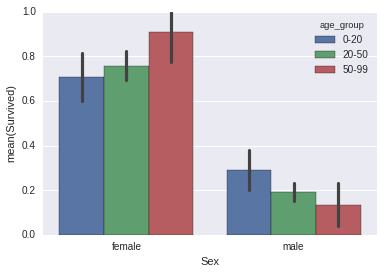

In [8]:
def getAgeGroup(n):
    if pd.isnull(n):
        return n
    if n < 20:
        return '0-20'
    elif n < 50:
        return '20-50'
    else:
        return "50-99"
    
train['age_group'] = train.Age.apply(getAgeGroup)

ax = sns.barplot(x='Sex', y='Survived',hue="age_group", data=train.sort_values('age_group'))

This confirms our earlier findings that younger men and older women survived.

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


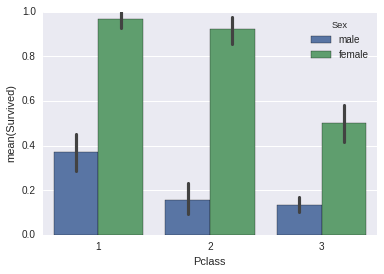

In [9]:
print train.groupby(['Pclass', 'Sex'])['Survived'].mean()
ax = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train.sort_values("Pclass"))

The people in the higher classes survived.

Pclass  age_group
1       0-20         0.809524
        20-50        0.702479
        50-99        0.454545
2       0-20         0.742857
        20-50        0.428571
        50-99        0.315789
3       0-20         0.333333
        20-50        0.203390
        50-99        0.090909
Name: Survived, dtype: float64


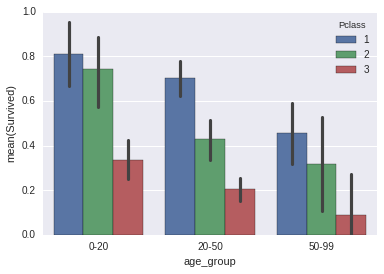

In [10]:
print train.groupby(['Pclass', 'age_group'])['Survived'].mean()
ax = sns.barplot(x="age_group", y="Survived", hue="Pclass", data=train.sort_values("Pclass"))

It seems age has the biggest effect on the droppoff in the middle class from 0-20 to 20-50.

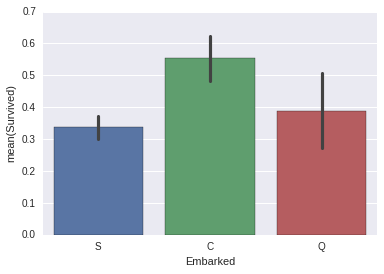

In [24]:
def trans_sibsp(n):
    if n > 1:
        return 2
    else:
        return n

# ax = sns.barplot(x="Parch", y="Survived", data=train.sort_values('Parch'))
# ax = sns.barplot(x=train.Parch > 0, y=train["Survived"])
ax = sns.barplot(x=train.Embarked, y=train["Survived"])
# ax = sns.barplot(x=(train.SibSp.apply(trans_sibsp)), y=train.Survived)

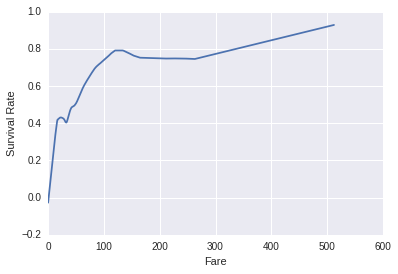

In [23]:
from statsmodels.nonparametric.smoothers_lowess import lowess


# sns.regplot(data=train, x='Age', y='Survived', lowess=True) # this makes a pretty line
# sns.regplot(data=male, x='Age', y='Survived', lowess=True) # this makes a flat line at 0.

# I also tried manually doing the regression, which is what seaborn does anyway.

l1 = lowess(train.Survived, train.Fare, it=1)
plt.plot(l1[:, 0], l1[:, 1]) # pretty line!
plt.xlabel('Fare')
plt.ylabel('Survival Rate')